# Figure 5

Run the steps below to generate the data and plot of Figure 5. As generating the data and the stellar pulsation removal take a while, one skip this step by inmediately running the last cell of this Jupyter notebook.

**Lennart van Sluijs** // 2019 Jan 8 // Leiden Observatory // vansluijs@strw.leidenuniv.nl

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
from pir_class import *
from sts_class import *

# Initialize Spectral Time Series
Create a Spectral Time Series from the Beta Pictoris UVES data for the right observation window.

In [2]:
sts = SpectralTimeSeries()
sts.init_from_obs('../data', '../output/figure1/sts_init')
sts.remove_NaN()
sts.save('../output/figure1/sts_data', 'sts')

# Planet injection routine
Run planet injection routine on the UVES Beta Pictoris data.

In [4]:
# reload spectral time series
sts = SpectralTimeSeries()
sts.load('../output/figure5/sts_data', 'sts')

# parameters for the planet injection routine
Rp = np.linspace(0.1, 1.0, 10) # planet radii injected [Rjup]
b = np.linspace(0, 1.0, 1) # impact parameter injected
A = 0.8 # intrinsic line depth
theta = 0 # spin-orbit misalignment
mode = 'spcorr' # planet injection routine mode
outputfolder = '../output/figure5/pir_spcorr' # outputfolder
veq = 130 # v sin i Beta Pic [km/s]
x0 = np.array([-200., -120., -100., -80., -60., -40., -20., 0., 20.,
          40., 60., 80., 100., 120., 200.])/veq # positions in front of star
snrlim = 3.0 # limit for the sensitivity adopted

# run planet injection routine
pir = PlanetInjectionRoutine(Rp, b, A, theta, x0, outputfolder,
                             sts, mode, spectsnr = None)

The following step takes about half an hour to finish on my personal laptop.

In [5]:
pir.runsim() # simulate lineprofiles
pir.runinj(plot = False) # inject signals
pir.getstats() # get snr

Simulation (1/10)
Simulation (2/10)
Simulation (3/10)
Simulation (4/10)
Simulation (5/10)
Simulation (6/10)
Simulation (7/10)
Simulation (8/10)
Simulation (9/10)
Simulation (10/10)
Used mode: spcorr
Injection (1/150)
Injection (2/150)
Injection (3/150)
Injection (4/150)
Injection (5/150)
Injection (6/150)
Injection (7/150)
Injection (8/150)
Injection (9/150)
Injection (10/150)
Injection (11/150)
Injection (12/150)
Injection (13/150)
Injection (14/150)
Injection (15/150)
Injection (16/150)
Injection (17/150)
Injection (18/150)
Injection (19/150)
Injection (20/150)
Injection (21/150)
Injection (22/150)
Injection (23/150)
Injection (24/150)
Injection (25/150)
Injection (26/150)
Injection (27/150)
Injection (28/150)
Injection (29/150)
Injection (30/150)
Injection (31/150)
Injection (32/150)
Injection (33/150)
Injection (34/150)
Injection (35/150)
Injection (36/150)
Injection (37/150)
Injection (38/150)
Injection (39/150)
Injection (40/150)
Injection (41/150)
Injection (42/150)
Injection (4

# Plot and save final result

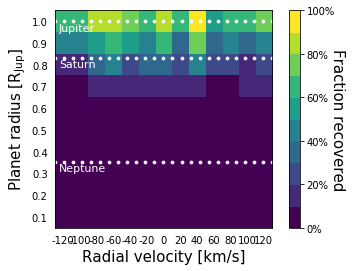

In [6]:
pir.plot_sensitivity(sigma = snrlim, veq = veq) # create plot

# save and show Figure 1
plt.savefig('../output/figure5/figure5.png', dpi = 300)
plt.savefig('../output/figure5/figure5.pdf')
plt.show()